# 第2章 k-近邻算法
## 2.1KNN 方法概述

In [2]:
import numpy as np
def createDataSet():
    """
    Desc:
        创建数据集和标签
    Args:
        None
    Returns:
        group -- 训练数据集的 features
        labels -- 训练数据集的 labels
    调用方式
    import kNN
    group, labels = kNN.createDataSet()
    """
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group,labels = createDataSet()
print(group)
print(labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


### KNN算法

In [7]:
from collections import Counter

def classify0(inX, dataSet, labels, k):
    """
    Desc:
        kNN 的分类函数
    Args:
        inX -- 用于分类的输入向量/测试数据
        dataSet -- 训练数据集的 features
        labels -- 训练数据集的 labels
        k -- 选择最近邻的数目
    Returns:
        sortedClassCount[0][0] -- 输入向量的预测分类 labels

    注意：labels元素数目和dataSet行数相同；程序使用欧式距离公式.

    预测数据所在分类可在输入下列命令
    kNN.classify0([0,0], group, labels, 3)
    """
    # ------------------------------------------------------------------------------------------------------------------------------------------
    # 实现 classify0() 方法的第二种方式

    # """
    # 1. 计算距离
    
    # 欧氏距离： 点到点之间的距离
    #    第一行： 同一个点 到 dataSet的第一个点的距离。
    #    第二行： 同一个点 到 dataSet的第二个点的距离。
    #    ...
    #    第N行： 同一个点 到 dataSet的第N个点的距离。

    # [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    # (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    
    # inx - dataset 使用了numpy broadcasting，见 https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
    # np.sum() 函数的使用见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html
    # """
    dist = np.sum((dataSet - inX)**2, axis=1)**0.5
    
    # """
    # 2. k个最近的标签
    
    # 对距离排序使用numpy中的argsort函数， 见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sort.html#numpy.sort
    # 函数返回的是索引，因此取前k个索引使用[0 : k]
    # 将这k个标签存在列表k_labels中
    # """
    k_labels = [labels[index] for index in dist.argsort()[0 : k]]
    # """
    # 3. 出现次数最多的标签即为最终类别
    
    # 使用collections.Counter可以统计各个标签的出现次数，most_common返回出现次数最多的标签tuple，例如[('lable1', 2)]，因此[0][0]可以取出标签值
    # """
    label = Counter(k_labels).most_common(1)[0][0]
    return label

    # ------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
label = classify0([0,0],group,labels,3)
print('类别 = '+str(label))

类别 = B


## 2.2使用KNN提高约会网站的配对效果


> 收集数据：提供文本文件

海伦把这些约会对象的数据存放在文本文件 [datingTestSet2.txt](../input/2.KNN/datingTestSet2.txt) 中，总共有 1000 行。海伦约会的对象主要包含以下 3 种特征：

* 每年获得的飞行常客里程数
* 玩视频游戏所耗时间百分比
* 每周消费的冰淇淋公升数

文本文件数据格式如下：
```
40920	8.326976	0.953952	3
14488	7.153469	1.673904	2
26052	1.441871	0.805124	1
75136	13.147394	0.428964	1
38344	1.669788	0.134296	1
```

> 准备数据：使用 Python 解析文本文件

将文本记录转换为 NumPy 的解析程序

In [11]:
def file2matrix(filename):
    """
    导入训练数据
    :param filename: 数据文件路径
    :return: 数据矩阵returnMat和对应的类别classLabelVector
    """
    fr = open(filename, 'r')
    # 获得文件中的数据行的行数
    numberOfLines = len(fr.readlines())
    # 生成对应的空矩阵
    # 例如：zeros(2，3)就是生成一个 2*3 的矩阵，各个位置上全是 0 
    returnMat = np.zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    fr = open(filename, 'r')
    index = 0
    for line in fr.readlines():
        # str.strip([chars]) --返回移除字符串头尾指定的字符生成的新字符串
        line = line.strip()
        # 以 '\t' 切割字符串
        listFromLine = line.split('\t')
        # 每列的属性数据，即 features
        returnMat[index] = listFromLine[0 : 3]
        # 每列的类别数据，就是 label 标签数据
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    # 返回数据矩阵returnMat和对应的类别classLabelVector
    return returnMat, classLabelVector

In [13]:
datingDataMat,datingLabels = file2matrix(r"../../../input/2.KNN/datingTestSet2.txt")
print(datingDataMat)
print(datingLabels[:20])

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]


> 分析数据：使用 Matplotlib 画二维散点图

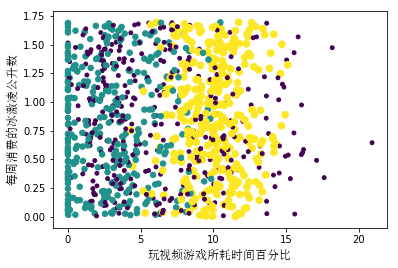

In [29]:
from pylab import matplotlib,mpl
import matplotlib.pyplot as plt
'''
解决中文乱码问题，原因是matplot.pyplot在显示时无法找到合适的字体
所以先把需要的字体（在C盘Windows下的Fonts目录中），添加到FontProperties中
'''
from matplotlib.font_manager import FontManager
myfont=matplotlib.font_manager.FontProperties(fname='C://Windows//Fonts//simsun.ttc',size=12)
mpl.rcParams['axes.unicode_minus']=False

axes=plt.subplot(111)
axes.scatter(datingDataMat[:,1],datingDataMat[:,2],15*np.array(datingLabels),15*np.array(datingLabels))

#设置X轴标签  
plt.xlabel(u'玩视频游戏所耗时间百分比',fontproperties=myfont) 
#设置Y轴标签  
plt.ylabel(u'每周消费的冰激凌公升数',fontproperties=myfont) 
plt.show()

> 分析数据：

为清晰展示数据，与上图不同，使用第0列和第1列数据，采用不同的属性值进行划分更为清晰

[False False  True  True  True  True False False  True False  True  True
 False  True  True  True  True  True False False]


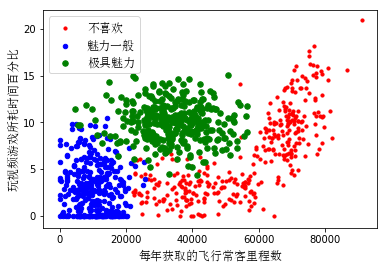

In [41]:
#三类，获取三类的索引值
mask1 = np.array(datingLabels) == 1
print(mask1[0:20])
mask2 = np.array(datingLabels) == 2
mask3 = np.array(datingLabels) == 3
df1 = datingDataMat[mask1,:]
df2 = datingDataMat[mask2,:]
df3 = datingDataMat[mask3,:]
axes=plt.subplot(111)
type1 = axes.scatter(df1[:,0],df1[:,1],s=10,marker='o',c='r')
type2 = axes.scatter(df2[:,0],df2[:,1],s=20,marker='o',c='b')
type3 = axes.scatter(df3[:,0],df3[:,1],s=30,marker='o',c='g')
#设置X轴标签  
plt.xlabel(u'每年获取的飞行常客里程数',fontproperties=myfont) 
#设置Y轴标签  
plt.ylabel(u'玩视频游戏所耗时间百分比',fontproperties=myfont) 
#设置图例
axes.legend((type1,type2,type3),(u'不喜欢',u'魅力一般',u'极具魅力'),loc=2,prop=myfont)

* 归一化数据 （归一化是一个让权重变为统一的过程，更多细节请参考： https://www.zhihu.com/question/19951858 ）
归一化特征值，消除特征之间量级不同导致的影响

**归一化定义：** 我是这样认为的，归一化就是要把你需要处理的数据经过处理后（通过某种算法）限制在你需要的一定范围内。首先归一化是为了后面数据处理的方便，其次是保正程序运行时收敛加快。 方法有如下：

1) 线性函数转换，表达式如下：　　
    
    y=(x-MinValue)/(MaxValue-MinValue)　　

    说明：x、y分别为转换前、后的值，MaxValue、MinValue分别为样本的最大值和最小值。　　

2) 对数函数转换，表达式如下：　　

    y=log10(x)　　

    说明：以10为底的对数函数转换。

    如图：
    
    <image src=''../../../images/2.KNN/knn_1.png''>

3) 反余切函数转换，表达式如下：

    y=arctan(x)*2/PI　

    如图：
    
    ![反余切函数图像](..//..//..//images/2.KNN/arctan_arccot.gif)

4) 式(1)将输入值换算为[-1,1]区间的值，在输出层用式(2)换算回初始值，其中和分别表示训练样本集中负荷的最大值和最小值。　
    

在统计学中，归一化的具体作用是归纳统一样本的统计分布性。归一化在0-1之间是统计的概率分布，归一化在-1--+1之间是统计的坐标分布。

### 归一化特征值

In [50]:
def autoNorm(dataSet):
    """
    Desc：
        归一化特征值，消除属性之间量级不同导致的影响
    Args：
        dataSet -- 需要进行归一化处理的数据集
    Returns：
        normDataSet -- 归一化处理后得到的数据集
        ranges -- 归一化处理的范围
        minVals -- 最小值

    归一化公式：
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    '''
    Numpy中数组.min()函数
    a = np.array([1,5,3],[4,2,6])
    a.min() #无参，所有中最小值
    a.min(0) #axis=0;每列的最小值
    a.min(1) #axis=1;每行的最小值
    '''

    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    # # -------第二种实现方式---start---------------------------------------
    '''
    第二种实现方式：使用numpy数组的广播机制
    '''
    normDataSet = (dataSet - minVals) / ranges
    # # -------第二种实现方式---end---------------------------------------------
    return normDataSet, ranges, minVals


In [52]:
normMat,ranges,minVals = autoNorm(datingDataMat)
print(normMat)
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


> 测试算法：使用海伦提供的部分数据作为测试样本。如果预测分类与实际类别不同，则标记为一个错误。

kNN 分类器针对约会网站的测试代码

In [59]:
def datingClassTest():
    """
    Desc：
        对约会网站的测试方法，并将分类错误的数量和分类错误率打印出来
    Args：
        None
    Returns：
        None
    """
    # 设置测试数据的的一个比例（训练数据集比例=1-hoRatio）
    hoRatio = 0.1  # 测试范围,一部分测试一部分作为样本
    # 从文件中加载数据
    datingDataMat, datingLabels = file2matrix("../../../input/2.KNN/datingTestSet2.txt")  # load data setfrom file
    # 归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # m 表示数据的行数，即矩阵的第一维
    m = normMat.shape[0]
    # 设置测试的样本数量， numTestVecs:m表示训练样本的数量
    numTestVecs = int(m * hoRatio)
    print('numTestVecs=', numTestVecs)
    errorCount = 0
    '''
    生成随机测试样本，需要从所有样本数量中随机选取，使用numpy.randon.randint(),产生指定范围随机数，
    例如，numpy.random.randint(10,size=5),产生5个数值在10以内的随机数
    '''
    for i in np.random.randint(m,size=numTestVecs): #（吕考考注）
#     for i in range(numTestVecs):
        # 对数据测试
        classifierResult = classify0(normMat[i], normMat[numTestVecs : m], datingLabels[numTestVecs : m], 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if(classifierResult != datingLabels[i]):
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / numTestVecs))
    print(errorCount)

In [61]:
#太占用空间，不输出
#datingClassTest()

## 2.3手写数字识别系统
#### 项目概述

构造一个能识别数字 0 到 9 的基于 KNN 分类器的手写数字识别系统。

需要识别的数字是存储在文本文件中的具有相同的色彩和大小：宽高是 32 像素 * 32 像素的黑白图像。

#### 开发流程

```
收集数据：提供文本文件。
准备数据：编写函数 img2vector(), 将图像格式转换为分类器使用的向量格式
分析数据：在 Python 命令提示符中检查数据，确保它符合要求
训练算法：此步骤不适用于 KNN
测试算法：编写函数使用提供的部分数据集作为测试样本，测试样本与非测试样本的
         区别在于测试样本是已经完成分类的数据，如果预测分类与实际类别不同，
         则标记为一个错误
使用算法：本例没有完成此步骤，若你感兴趣可以构建完整的应用程序，从图像中提取
         数字，并完成数字识别，美国的邮件分拣系统就是一个实际运行的类似系统
```

> 收集数据: 提供文本文件

目录 [trainingDigits](../input/2.KNN/trainingDigits) 中包含了大约 2000 个例子，每个例子内容如下图所示，每个数字大约有 200 个样本；目录 [testDigits](../input/2.KNN/testDigits) 中包含了大约 900 个测试数据。


> 准备数据: 编写函数 img2vector(), 将图像文本数据转换为分类器使用的向量

将图像文本数据转换为向量

In [62]:
def img2vector(filename):
    """
    Desc：
        将图像数据转换为向量
    Args：
        filename -- 图片文件 因为我们的输入数据的图片格式是 32 * 32的
    Returns:
        returnVect -- 图片文件处理完成后的一维矩阵

    该函数将图像转换为向量：该函数创建 1 * 1024 的NumPy数组，然后打开给定的文件，
    循环读出文件的前32行，并将每行的头32个字符值存储在NumPy数组中，最后返回数组。
    """
    returnVect = np.zeros((1, 1024))
    fr = open(filename, 'r')
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

In [63]:
testVector = img2vector(r'../../../input/2.KNN/testDigits/0_13.txt')
print(testVector[0,0:32])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


> 训练算法：此步骤不适用于 KNN

因为测试数据每一次都要与全量的训练数据进行比较，所以这个过程是没有必要的。

> 测试算法：编写函数使用提供的部分数据集作为测试样本，如果预测分类与实际类别不同，则标记为一个错误

In [66]:
#导入os模块
import os

def handwritingClassTest():
    """
    Desc:
        手写数字识别分类器，并将分类错误数和分类错误率打印出来
    Args:
        None
    Returns:
        None
    """
    # 1. 导入数据
    hwLabels = []
    '''
    os.listdir() 方法用于返回指定的文件夹包含的文件或文件夹的名字的列表。这个列表以字母顺序
    '''
    trainingFileList = os.listdir("../../../input/2.KNN/trainingDigits") # load the training set 
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024))
    # hwLabels存储0～9对应的index位置， trainingMat存放的每个位置对应的图片向量
    for i in range(m):
        '''
        从文件名中解析出分类数字，该目录下的文件按照规则命名，如文件9_45.txt的分类是9
        它是数字9的第45个实例
        '''
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        # 将 32*32的矩阵->1*1024的矩阵
        trainingMat[i] = img2vector('../../../input/2.KNN/trainingDigits/%s' % fileNameStr)

    # 2. 导入测试数据
    testFileList = os.listdir('../../../input/2.KNN/testDigits')  # iterate through the test set
    errorCount = 0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('../../../input/2.KNN/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        errorCount += classifierResult != classNumStr
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount / mTest))

In [67]:
handwritingClassTest()

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answe

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answe

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answe

the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answe

the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answe

the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answe

## KNN 小结

经过上面的介绍我们可以知道， k 近邻算法有 三个基本的要素：

* k 值的选择

    * k 值的选择会对 k 近邻算法的结果产生重大的影响。
    * 如果选择较小的 k 值，就相当于用较小的邻域中的训练实例进行预测，“学习”的近似误差（approximation error）会减小，只有与输入实例较近的（相似的）训练实例才会对预测结果起作用。但缺点是“学习”的估计误差（estimation error）会增大，预测结果会对近邻的实例点非常敏感。如果邻近的实例点恰巧是噪声，预测就会出错。换句话说，k 值的减小就意味着整体模型变得复杂，容易发生过拟合。
    * 如果选择较大的 k 值，就相当于用较大的邻域中的训练实例进行预测。其优点是可以减少学习的估计误差。但缺点是学习的近似误差会增大。这时与输入实例较远的（不相似的）训练实例也会对预测起作用，使预测发生错误。 k 值的增大就意味着整体的模型变得简单。
    * 近似误差和估计误差，请看这里：https://www.zhihu.com/question/60793482

* 距离度量

    * 特征空间中两个实例点的距离是两个实例点相似程度的反映。
    * k 近邻模型的特征空间一般是 n 维实数向量空间 ![向量空间](../images/2.KNN/knn_3.png) 。使用的距离是欧氏距离，但也可以是其他距离，如更一般的 ![Lp距离](../images/2.KNN/knn_4.png) 距离，或者 Minkowski 距离。

* 分类决策规则

    * k 近邻算法中的分类决策规则往往是多数表决，即由输入实例的 k 个邻近的训练实例中的多数类决定输入实例的类。
